In [2]:
from flaregress.io import DatabaseHandler
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# Load database from h5 file
db = DatabaseHandler()
db.load('./trial_data/db.h5')

In [4]:
# Model hyperparameters
p = 5; d = 1; q = 0
split_fraction = 0.8
entry_number = 4000

In [5]:
db.entries[entry_number]['xrs'][:15]

,xrsa,xrsb
1980-06-27 21:09:01.500,1.260000e-07,0.000003
1980-06-27 21:09:04.500,1.300000e-07,0.000003
1980-06-27 21:09:07.500,1.320000e-07,0.000003
1980-06-27 21:09:10.500,1.330000e-07,0.000003
1980-06-27 21:09:13.500,1.360000e-07,0.000003
1980-06-27 21:09:16.500,1.400000e-07,0.000003
1980-06-27 21:09:19.500,1.400000e-07,0.000003
1980-06-27 21:09:22.500,1.420000e-07,0.000003
1980-06-27 21:09:25.500,1.460000e-07,0.000003
1980-06-27 21:09:28.500,1.470000e-07,0.000003


In [6]:
# Process data for ARIMA
split = int(len(db.entries[entry_number]['xrs'].values) * split_fraction)
training_stream = [x[0] for x in db.entries[entry_number]['xrs'].values[:split]]
test_stream = [x[0] for x in db.entries[entry_number]['xrs'].values[split:]]

In [7]:
# Train model
model = ARIMA(training_stream, order=(p, d, q))
model = model.fit(disp=0)
print(model.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  327
Model:                 ARIMA(5, 1, 0)   Log Likelihood                5105.324
Method:                       css-mle   S.D. of innovations              0.000
Date:                Mon, 10 Dec 2018   AIC                         -10196.648
Time:                        12:38:59   BIC                         -10170.118
Sample:                             1   HQIC                        -10186.062
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.214e-10   3.78e-08     -0.009      0.993   -7.44e-08    7.37e-08
ar.L1.D.y     -0.4223      0.055     -7.685      0.000      -0.530      -0.315
ar.L2.D.y     -0.3384      0.059     -5.760      0.0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [9]:
# Test model
n = len(test_stream)
history = training_stream[:]
predictions = []
for i in range(n):
    model = ARIMA(history, order=(p, d, q))
    model = model.fit(disp=0)
    yhat = model.forecast()[0]
    predictions.append(yhat)
    history.append(test_stream[i])
print('Test MSE error:', mean_squared_error(test_stream, predictions))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.frame

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.frame

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.frame

Test MSE error: 1.346491156378401e-18


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


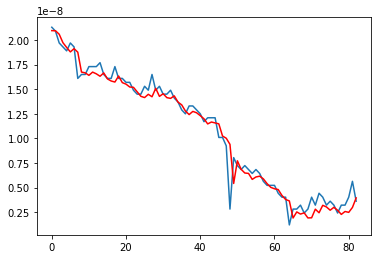

In [11]:
# Plot the results
plt.plot(test_stream)
plt.plot(predictions, color='red')
plt.show()